In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('Iris.csv')
data.drop_duplicates(inplace = True)
# since perceptron can only predict 1 and -1
data['species'] = data['species'].map({'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': -1})
data = data[data['species'] != 0]
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1


In [15]:
class Perceptron:
    def __init__(self, alpha, times):
        self.alpha = alpha
        self.times = times
    def step(self, z): # step function, z is the parameter of step function; if z>=0, return 1; else return -1.
        return np.where(z>=0, 1, -1)
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.w_ = np.zeros(1+X.shape[1])
        self.loss_ = []
        for i in range(self.times):
            # difference between perceptron and logistic regression
            # in logistic regression, all data are used to calculate gradient, then change w
            # in perceptron, individual data is used one-by-one to calculate gradient and change w
            loss = 0
            for x, target in zip(X,y):
                # calculate prediction (y_hat)
                prediction = self.step(np.dot(x, self.w_[1:])+self.w_[0])
                loss += (prediction != target) # if prediction == target, return 0, loss do not increas
                # change w, w(j) = w(j) + alpha * (y-prediction) * x(j)
                self.w_[0] += self.alpha * (target-prediction)
                self.w_[1:] += self.alpha * (target-prediction)*x
            self.loss_.append(loss)
    def predict(self, X):
        return self.step(np.dot(X, self.w_[1:])+self.w_[0]) # return 1 or -1

In [20]:
t1 = data[data['species']== 1]
t2 = data[data['species']== -1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis = 0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis = 0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis = 0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis = 0)

p = Perceptron(0.1, 10)
p.fit(train_X, train_y)
result = p.predict(test_X)
display(result)
display(test_y.values)
display(p.w_)
display(p.loss_)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

array([-0.4 , -0.44, -1.44,  1.88,  0.72])

[1, 2, 3, 2, 0, 0, 0, 0, 0, 0]

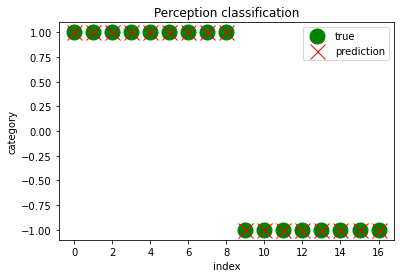

In [22]:
import matplotlib as mp;
import matplotlib.pyplot as plt

plt.plot(test_y.values, 'go', ms = 15, label='true')
plt.plot(result, 'rx', ms = 15, label='prediction')
plt.title('Perception classification')
plt.xlabel('index')
plt.ylabel('category')
plt.legend()
plt.show()

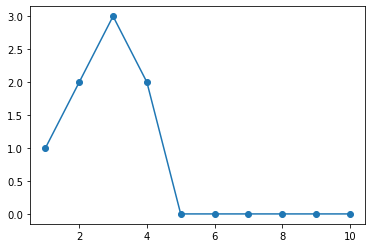

In [23]:
plt.plot(range(1,p.times+1), p.loss_, 'o-')